In [75]:
import numpy as np
import pandas as pd

header=['user_id','item_id','rating','timestamp']
df = pd.read_csv('ml-100k/u.data',sep='\t',names=header,encoding='latin-1')
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print('Number of users ='+ str(n_users)+ ' | Number of movies = '+ str(n_items))

Number of users =943 | Number of movies = 1682


In [76]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df,test_size=0.25)
train_data= pd.DataFrame(train_data)
test_data= pd.DataFrame(test_data)

R = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    R[line[1]-1, line[2]-1] = line[3]

T = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    T[line[1]-1, line[2]-1] = line[3]

In [77]:
I = R.copy()
I[I > 0] = 1
I[I == 0] = 0

I2 = T.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [78]:
#predict the unknown ratings
def prediction(P,Q):
    return np.dot(P.T,Q)

In [79]:
lmbda = 0.1 # Regularisation weight
k = 2  # Dimensionality of the latent feature space
m,n = np.shape(R)  # Number of users and items
n_epochs = 8  # Number of epochs
gamma = 0.05 # Learning rate

In [80]:
P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [81]:
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R>0]))
#     return np.sqrt(np.mean(I * (R - prediction(P,Q))**2))·

In [82]:
L_train = []
L_validation= []
#Only consider non-zero matrix 
users,items = R.nonzero()
for epoch in range(n_epochs):
#     count = 0
    for (u,i) in zip(users,items):
#         if count<50000:
        e = R[u,i] - prediction(P[:,u],Q[:,i])  # Calculate error for gradient
        P[:,u] = P[:,u] + gamma * (e * Q[:,i] - lmbda * P[:,u])  # Update latent user feature matrix
        Q[:,i] = Q[:,i] + gamma * (e * P[:,u] - lmbda * Q[:,i])  # Update latent movie feature matrix
        train_rmse = rmse(I,R,Q,P) # Calculate root mean squared error from train dataset
        test_rmse = rmse(I2,T,Q,P)# Calculate root mean squared error from test dataset
        L_train.append(train_rmse)
        L_validation.append(test_rmse)
#         L_train[count]=train_rmse
#         L_validation[count]=test_rmse
#         count+=1

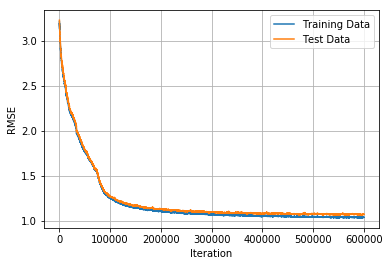

,Actual Rating,Predicted Rating
0,4.0,3.281555
6,4.0,3.442064
8,3.0,3.360856
12,3.0,3.496814
99,4.0,3.487000


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
# Check performance by plotting train and test errors
plt.plot( L_train, label='Training Data')
plt.plot( L_validation, label='Test Data')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# calculate prediction matrix
R = pd.DataFrame(R)
R_hat = pd.DataFrame(prediction(P, Q))

# compare true ratings of user 17 with predictions
ratings = pd.DataFrame(data=R.loc[16, R.loc[16,:] > 0]).head(n=5)
ratings['Prediction'] = R_hat.loc[16, R.loc[16,:] > 0]
ratings.columns = ['Actual Rating', 'Predicted Rating']
ratings